In [73]:
import phoebe 
from phoebe import u, c
import numpy as np
import matplotlib.pyplot as plt

# Import data 

In [74]:
lc = np.loadtxt('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/detrended_lc.dat')
rvs = np.loadtxt('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/rvs.dat')

In [75]:
b = phoebe.default_binary()

In [76]:
lc_times = lc[:, 0] - 2400000
b.add_dataset('lc', times = lc_times,
               fluxes = lc[:, 3], 
               sigmas = lc[:, 4],  
               compute_phases = phoebe.linspace(0, 1, 101),
               passband = 'Kepler:mean')

rv_times = rvs[:, 0] - 2400000
b.add_dataset('rv')
b.set_value_all('times@rv', value = rv_times) 
b['rvs@rv@primary'], b['sigmas@rv@primary'] = rvs[:, 1], rvs[:, 2]
b['rvs@rv@secondary'], b['sigmas@rv@secondary'] = rvs[:, 3], rvs[:, 4]

In [77]:
period = 10.3
b.set_value('period@binary', value = period)

ztime = 55750 # zero point within both c and rv ranges
b.set_value('t0_supconj', value = ztime)

teff1 = 6700 # avg temperature of F type main sequence star
b['teff@primary@component'] = teff1

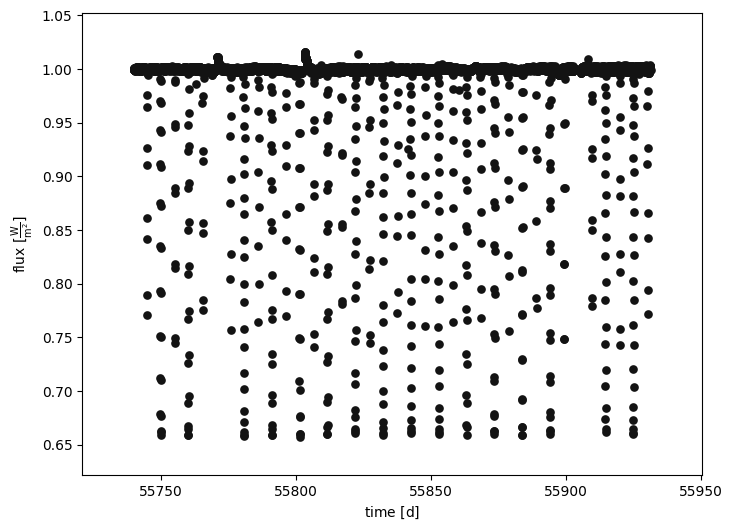

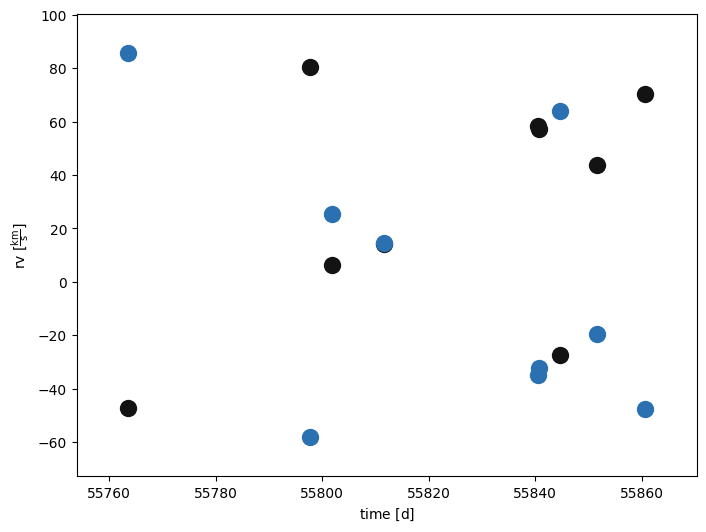

In [78]:
_ = b.plot(dataset = 'lc01', show = True, marker = '.')
_ = b.plot(dataset = 'rv01', show = True, marker = 'o')

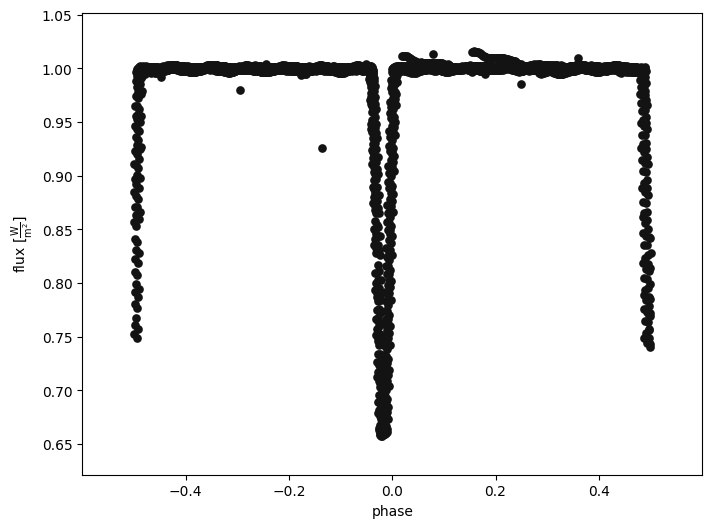

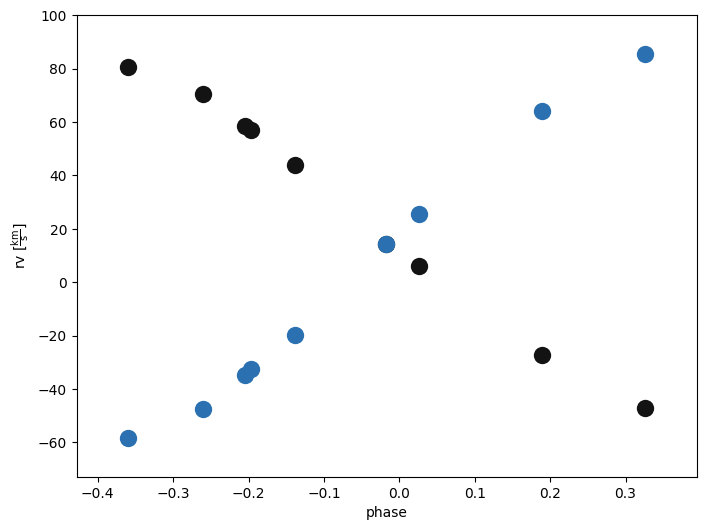

In [79]:
_ = b.plot(dataset = 'lc01', x = 'phases', show = True, marker = '.')
_ = b.plot(dataset = 'rv01', x = 'phases', show = True, marker = 'o')

# Prepare the model parameters

In [80]:
b.set_value('pblum_mode', 'dataset-scaled')

In [81]:
b.set_value_all('distortion_method', 'sphere')

In [82]:
b.set_value_all('atm', 'blackbody')
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_mode_bol', 'manual')

# RV Geometry

In [83]:
b.flip_constraint('asini@binary', solve_for = 'sma@binary')

<ConstraintParameter: {sma@binary@component} = {asini@binary@component} / (sin({incl@binary@component})) (solar units) => 5.3 solRad>

In [84]:
b.add_solver('estimator.rv_geometry', solver = 'rv_geom')

<ParameterSet: 7 parameters | qualifiers: phase_nbins, comments, orbit, phase_bin, use_server, expose_model, rv_datasets>

In [85]:
b.run_solver('rv_geom', solution = 'rvgeom_sol')

<ParameterSet: 17 parameters | components: secondary, primary>

In [86]:
for param, value, unit in zip(b.get_value('fitted_twigs', solution='rvgeom_sol'),
                       b.get_value('fitted_values', solution='rvgeom_sol'),
                        b.get_value('fitted_units', solution='rvgeom_sol')):
     
     print(f'{param} = {value:.2f} {unit}')

t0_supconj@binary@orbit@component = 55749.95 d
q@binary@orbit@component = 0.90 
asini@binary@orbit@component = 18260488.26 km
ecc@binary@orbit@component = 0.31 
per0@binary@orbit@component = 4.72 rad
vgamma@system = 14.81 km / s


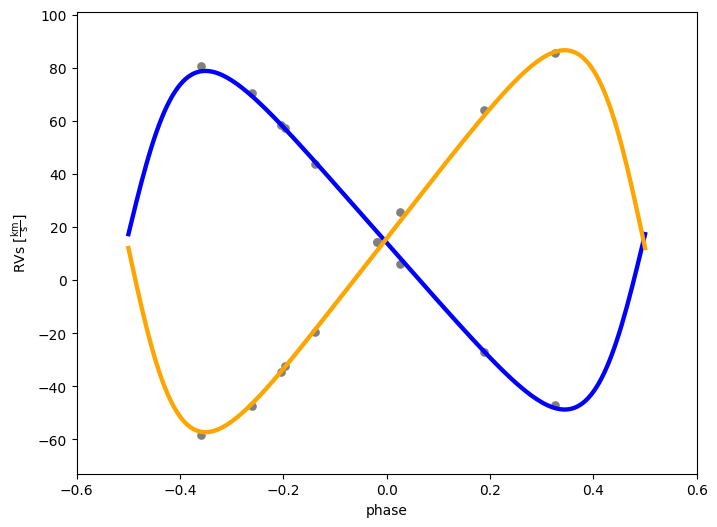

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [87]:
b.plot('rvgeom_sol', x = 'phases', show = True)

In [88]:
b.adopt_solution('rvgeom_sol')

<ParameterSet: 26 parameters | contexts: component, dataset, system>

In [89]:
b.run_compute(model = 'rvgeom_model')

100%|██████████| 110/110 [00:07<00:00, 14.74it/s]


<ParameterSet: 8 parameters | kinds: rv, lc>

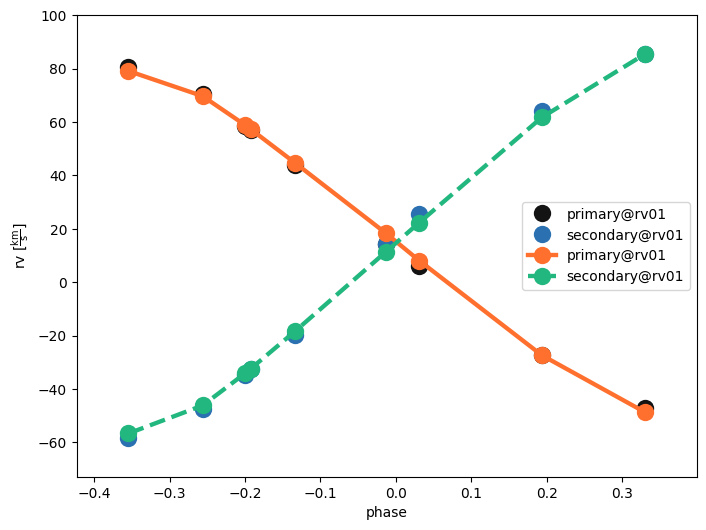

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [90]:
b.plot(model = 'rvgeom_model', kind = 'rv', x = 'phases', legend = True, show = True, marker = 'o')

# LC Geometry

In [91]:
b.flip_constraint('teffratio', solve_for = 'teff@secondary')
b.flip_constraint('requivratio', solve_for = 'requiv@primary')
b.flip_constraint('requivsumfrac', solve_for = 'requiv@secondary')

<ConstraintParameter: {requiv@secondary@component} = (({requivratio@binary@component} * {requivsumfrac@binary@component}) * {sma@binary@component}) / ({requivratio@binary@component} + 1.000000) (solar units) => 1.0 solRad>

In [92]:
b.add_solver('estimator.lc_geometry', solver = 'lc_geom')

<ParameterSet: 11 parameters | qualifiers: lc_datasets, phase_nbins, comments, orbit, phase_bin, analytical_model, t0_near_times, use_server, expose_model, lc_combine, interactive>

In [93]:
b.run_solver('lc_geom', solution = 'lcgeom_sol')

<ParameterSet: 21 parameters | qualifiers: analytic_phases, fitted_values, analytic_best_model, input_phases, primary_depth, secondary_width, adopt_parameters, secondary_depth, input_sigmas, input_fluxes, secondary_phase, fitted_twigs, adopt_distributions, eclipse_edges, orbit, comments, primary_phase, primary_width, adopt_values, analytic_fluxes, fitted_units>

In [94]:
for param, value, unit in zip(b.get_value('fitted_twigs', solution='lcgeom_sol')[:5],
                       b.get_value('fitted_values', solution='lcgeom_sol')[:5],
                        b.get_value('fitted_units', solution='lcgeom_sol')[:5]):
     
     print(f'{param} = {value:.2f} {unit}')

t0_supconj@binary@orbit@component = 55749.81 d
ecc@binary@orbit@component = 0.22 
per0@binary@orbit@component = 1.46 rad
requivsumfrac@binary@orbit@component = 0.12 
teffratio@binary@orbit@component = 0.89 


In [98]:
b.adopt_solution('lcgeom_sol')

<ParameterSet: 19 parameters | contexts: component, dataset>

In [99]:
b.run_compute(model = 'lcgeom_model')

100%|██████████| 110/110 [00:09<00:00, 11.33it/s]


<ParameterSet: 8 parameters | kinds: rv, lc>

In [101]:
b.run_solver('lc_geom', solution='lcgeom_sol', overwrite=True)

<ParameterSet: 21 parameters | qualifiers: analytic_phases, fitted_values, analytic_best_model, input_phases, primary_depth, secondary_width, adopt_parameters, secondary_depth, input_sigmas, input_fluxes, secondary_phase, fitted_twigs, adopt_distributions, eclipse_edges, orbit, comments, primary_phase, primary_width, adopt_values, analytic_fluxes, fitted_units>

In [102]:
for param, value, unit in zip(b.get_value('fitted_twigs', solution='lcgeom_sol')[:5],
                       b.get_value('fitted_values', solution='lcgeom_sol')[:5],
                        b.get_value('fitted_units', solution='lcgeom_sol')[:5]):
     
     print(f'{param} = {value:.2f} {unit}')

t0_supconj@binary@orbit@component = 55749.81 d
ecc@binary@orbit@component = 0.23 
per0@binary@orbit@component = 1.46 rad
requivsumfrac@binary@orbit@component = 0.12 
teffratio@binary@orbit@component = 0.89 


In [103]:
b.adopt_solution('lcgeom_sol')

<ParameterSet: 19 parameters | contexts: component, dataset>

In [104]:
b.run_compute(model = 'lcgeom_model', overwrite = True)

100%|██████████| 110/110 [00:10<00:00, 10.75it/s]


<ParameterSet: 8 parameters | kinds: rv, lc>

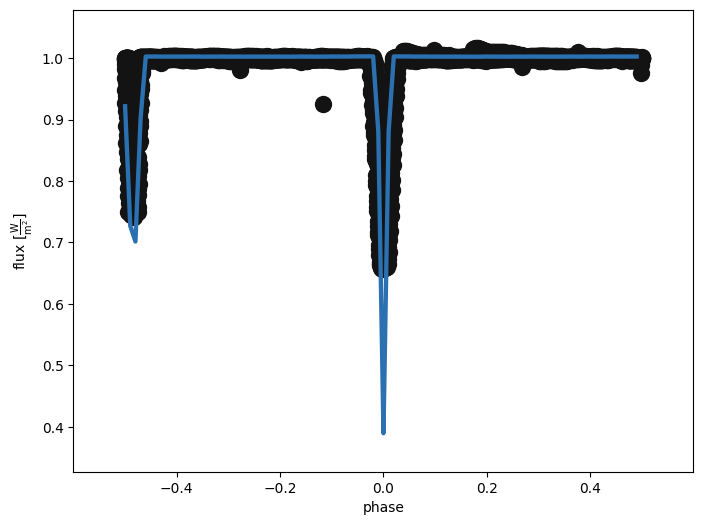

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [109]:
b.plot(model = 'lcgeom_model', kind = 'lc', x = 'phases', show = True)

/home/karanbt/miniconda3/envs/astro/lib/python3.11/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


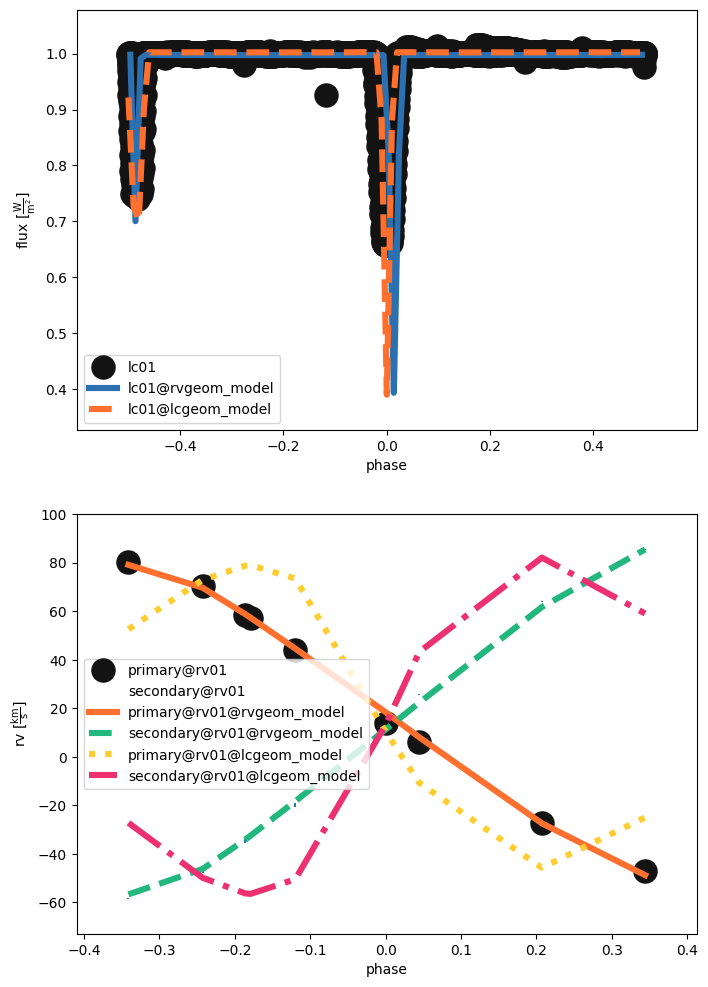

(<autofig.figure.Figure | 2 axes | 9 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [114]:
b.plot(x = 'phases', show = True, legend = True)

In [119]:
b.save('after_estimators.bundle')

'after_estimators.bundle'